# Assignment 4: Convolutional Neural Networks
* Carboni Leonardo (0279048)
* Bais Giacomo (5355583)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LayerNormalization, BatchNormalization

from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model, to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [26]:
def plot_loss(hist, model_name):
    plt.plot(hist.history['loss'], label="Train")
    plt.plot(hist.history['val_loss'], label="Validation")
    plt.title(f"{model_name} train and validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f"./Losses/{model_name}.png")
    plt.show()
    plt.plot(hist.history['accuracy'], label="Train")
    plt.plot(hist.history['val_accuracy'], label="Validation")
    plt.title(f"{model_name} train and validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(f"./Losses/{model_name}_accuracy.png")
    plt.show()
    return

# Data processing

In [27]:
# Load data
(x_train_and_val, y_train_and_val), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data in 0-1 range
x_train_and_val = x_train_and_val / 255.0
y_train_and_val = to_categorical(y_train_and_val)

x_test = x_test / 255.0
y_test = to_categorical(y_test)

In [28]:
# building a validation set (20% of the training set)
train_size = int(x_train_and_val.shape[0] * 0.8)
validation_size = x_train_and_val.shape[0] - train_size

x_validation, y_validation = (x_train_and_val[train_size:], y_train_and_val[train_size:])
x_train, y_train = (x_train_and_val[:train_size], y_train_and_val[:train_size])

In [29]:
img_width = 28
img_height = 28
num_classes = 10
channels = 1

# Baseline model
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. output

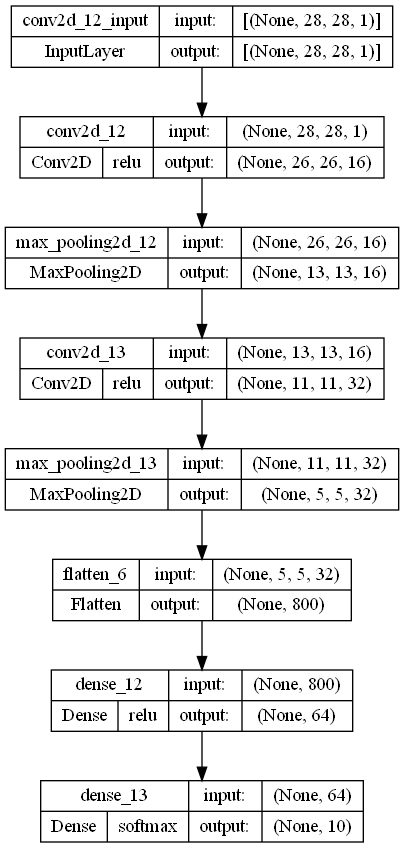

In [30]:

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, show_layer_activations=True, to_file="./Models/baseline_model.png")

In [31]:
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 24s 15ms/step - loss: 0.5396 - accuracy: 0.8030 - val_loss: 0.4033 - val_accuracy: 0.8572
Epoch 2/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3656 - accuracy: 0.8677 - val_loss: 0.3445 - val_accuracy: 0.8762
Epoch 3/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3170 - accuracy: 0.8841 - val_loss: 0.3138 - val_accuracy: 0.8878
Epoch 4/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2880 - accuracy: 0.8950 - val_loss: 0.3062 - val_accuracy: 0.8858
Epoch 5/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2654 - accuracy: 0.9032 - val_loss: 0.2778 - val_accuracy: 0.8979
Epoch 6/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2474 - accuracy: 0.9109 - val_loss: 0.2792 - val_accuracy: 0.9012
Epoch 7/15
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2325 - accuracy: 0.9135 - val_loss: 0.2828 -

In [32]:
print('\nTraining accuracy:', np.max(history.history['accuracy']))
print('\nValidation accuracy:', np.max(history.history['val_accuracy']))

# in depth evaluation for the last model trained
predictions = model.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9470000267028809

Validation accuracy: 0.9079166650772095
375/375 [==============================] - 2s 4ms/step
Precision:  0.9079993929152256
Recall:  0.9077583992803053


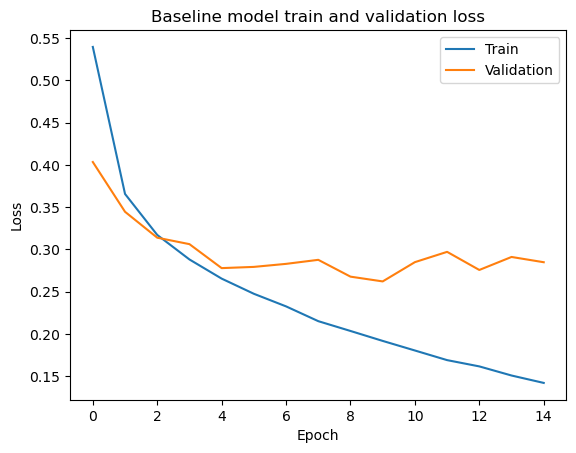

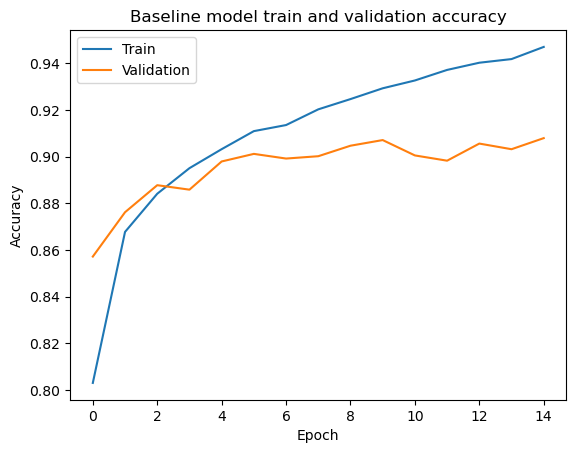

In [33]:
plot_loss(history, "Baseline model")

# Model 2: dropout layer
1. input
2. convolution
3. pooling
4. dropout
5. convolution
6. pooling
7. dropout
8. flatten
9. dense
10. dropout
11. output

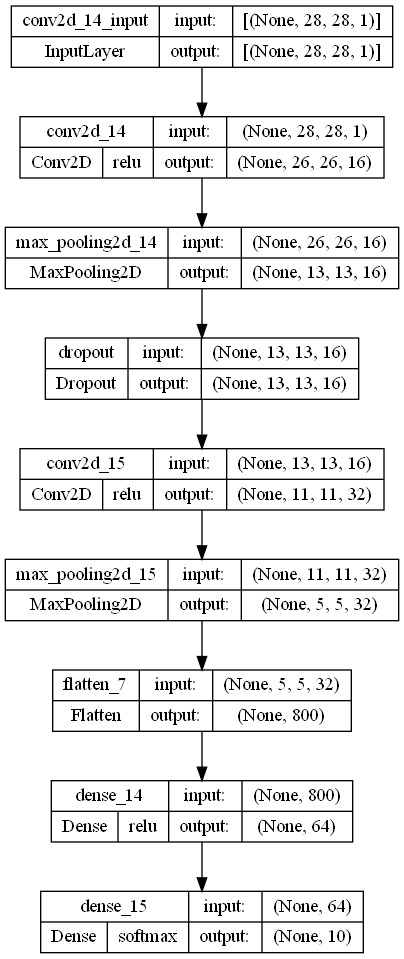

In [34]:

model2 = Sequential()
model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
# model2.add(Dropout(0.3))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model2, show_shapes=True, show_layer_activations=True, to_file="./Models/model2.png")

In [35]:
history2 = model2.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 20s 12ms/step - loss: 0.5909 - accuracy: 0.7857 - val_loss: 0.4539 - val_accuracy: 0.8377
Epoch 2/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.4037 - accuracy: 0.8540 - val_loss: 0.3677 - val_accuracy: 0.8677
Epoch 3/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3521 - accuracy: 0.8723 - val_loss: 0.3255 - val_accuracy: 0.8853
Epoch 4/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3227 - accuracy: 0.8827 - val_loss: 0.2947 - val_accuracy: 0.8926
Epoch 5/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3031 - accuracy: 0.8894 - val_loss: 0.2886 - val_accuracy: 0.8980
Epoch 6/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2850 - accuracy: 0.8970 - val_loss: 0.2813 - val_accuracy: 0.8975
Epoch 7/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2701 - accuracy: 0.9002 - val_loss: 0.2671 -

In [36]:
print('\nTraining accuracy:', np.max(history2.history['accuracy']))
print('\nValidation accuracy:', np.max(history2.history['val_accuracy']))

predictions = model2.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9204791784286499

Validation accuracy: 0.9109166860580444
375/375 [==============================] - 2s 4ms/step
Precision:  0.9087841819245357
Recall:  0.9083829000996966


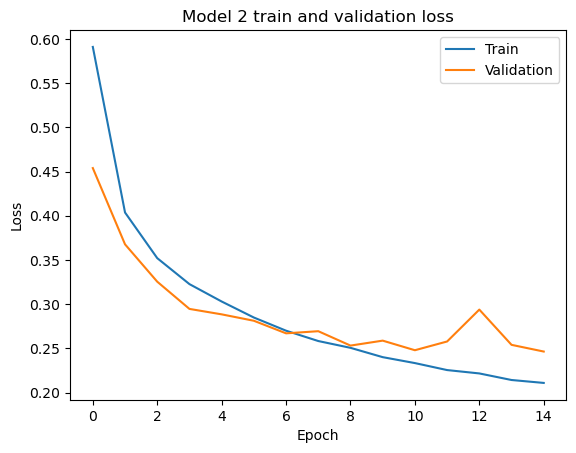

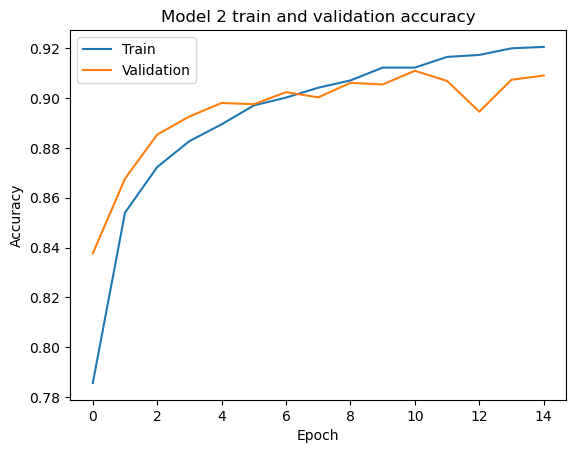

In [37]:
plot_loss(history2, "Model 2")

# Model 3: Double fully connected layer
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. dense
9. output

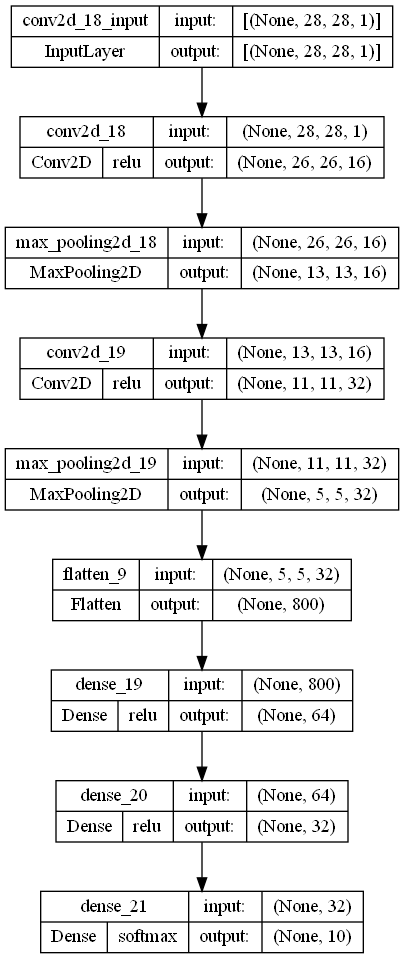

In [42]:
model3 = Sequential()
model3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model3, show_shapes=True, show_layer_activations=True, to_file="./Models/model3.png")

In [43]:
history3 = model3.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 22s 14ms/step - loss: 0.5550 - accuracy: 0.7980 - val_loss: 0.4512 - val_accuracy: 0.8367
Epoch 2/15
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3767 - accuracy: 0.8610 - val_loss: 0.3561 - val_accuracy: 0.8702
Epoch 3/15
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3251 - accuracy: 0.8803 - val_loss: 0.3506 - val_accuracy: 0.8726
Epoch 4/15
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2948 - accuracy: 0.8915 - val_loss: 0.3206 - val_accuracy: 0.8813
Epoch 5/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2686 - accuracy: 0.9014 - val_loss: 0.2959 - val_accuracy: 0.8946
Epoch 6/15
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2478 - accuracy: 0.9084 - val_loss: 0.2983 - val_accuracy: 0.8939
Epoch 7/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2325 - accuracy: 0.9141 - val_loss: 0.2847 -

In [44]:
print('\nTraining accuracy:', np.max(history3.history['accuracy']))
print('\nValidation accuracy:', np.max(history3.history['val_accuracy']))

predictions = model3.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9447708129882812

Validation accuracy: 0.909500002861023
375/375 [==============================] - 2s 4ms/step
Precision:  0.9073077789007167
Recall:  0.9029373613642004


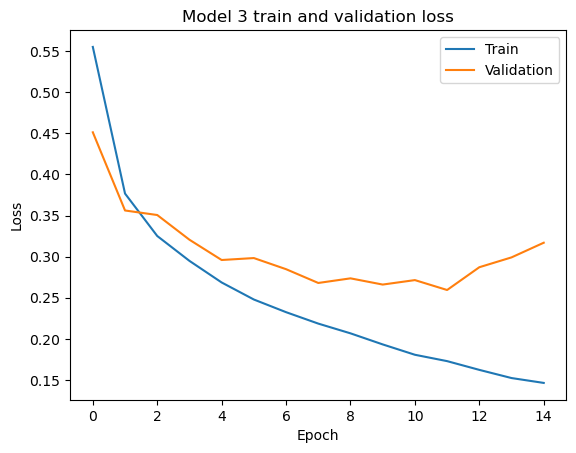

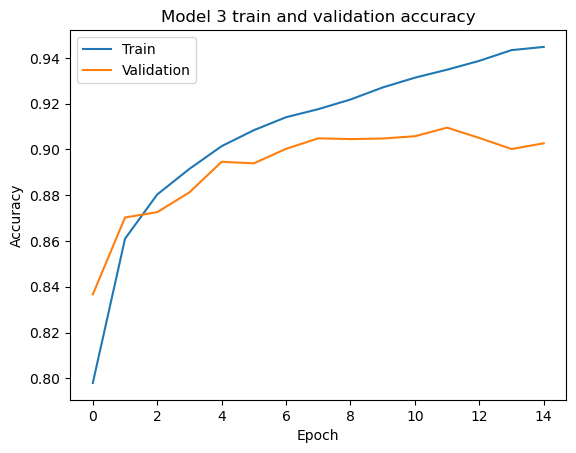

In [45]:
plot_loss(history3, "Model 3")

# Model 4: Layer Normalization
1. input
2. convolution
3. layer normalization
4. pooling
5. convolution
6. layer normalization
7. pooling
8. flatten
9. dense
10. output

In [ ]:
model4 = Sequential()
model4.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(model4, show_shapes=True, show_layer_activations=True, to_file="./Models/model4.png")
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 batch_normalization_3 (Batc  (None, 11, 11, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
history4 = model4.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 28s 18ms/step - loss: 0.4164 - accuracy: 0.8474 - val_loss: 0.3418 - val_accuracy: 0.8748
Epoch 2/15
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2906 - accuracy: 0.8936 - val_loss: 0.2920 - val_accuracy: 0.8909
Epoch 3/15
1500/1500 [==============================] - 23s 16ms/step - loss: 0.2507 - accuracy: 0.9065 - val_loss: 0.2967 - val_accuracy: 0.8929
Epoch 4/15
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2207 - accuracy: 0.9162 - val_loss: 0.2982 - val_accuracy: 0.8947
Epoch 5/15
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1993 - accuracy: 0.9255 - val_loss: 0.3061 - val_accuracy: 0.8907
Epoch 6/15
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1783 - accuracy: 0.9326 - val_loss: 0.2930 - val_accuracy: 0.8996
Epoch 7/15
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1627 - accuracy: 0.9396 - val_loss: 0.2815 -

In [ ]:
print('\nTraining accuracy:', np.max(history4.history['accuracy']))
print('\nValidation accuracy:', np.max(history4.history['val_accuracy']))

predictions = model4.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9705625176429749

Validation accuracy: 0.9089166522026062
375/375 [==============================] - 2s 5ms/step
Precision:  0.901129550704367
Recall:  0.8995408954902789


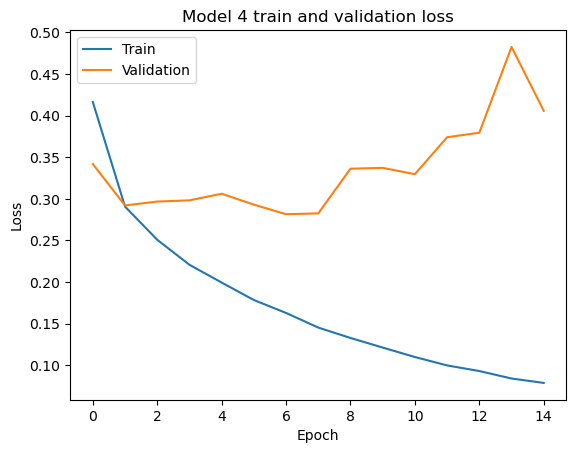

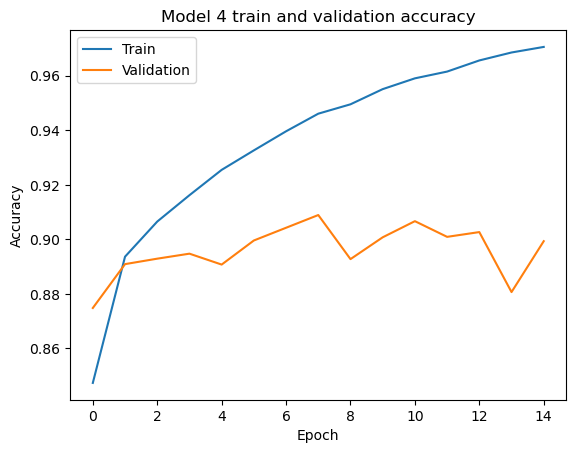

In [ ]:
plot_loss(history4, "Model 4")

# Model 5: Lower Learning rate
Same as baseline model, but with a lower learning rate
1. input
2. convolution
3. pooling
4. convolution
5. pooling
6. flatten
7. dense
8. output

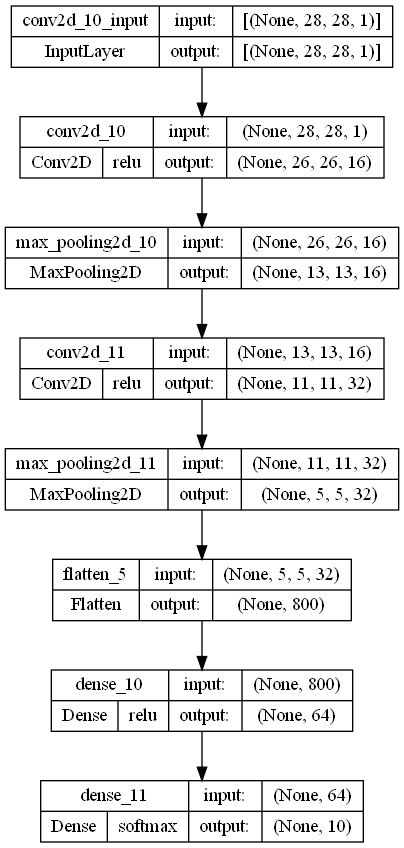

In [ ]:
model5 = Sequential()
model5.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0008), metrics=['accuracy'])
plot_model(model5, show_shapes=True, show_layer_activations=True, to_file="./Models/model5.png")

In [ ]:
history5 = model5.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.5477 - accuracy: 0.8009 - val_loss: 0.4042 - val_accuracy: 0.8543
Epoch 2/15
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3751 - accuracy: 0.8658 - val_loss: 0.3520 - val_accuracy: 0.8749
Epoch 3/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3283 - accuracy: 0.8811 - val_loss: 0.3265 - val_accuracy: 0.8794
Epoch 4/15
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2993 - accuracy: 0.8908 - val_loss: 0.3139 - val_accuracy: 0.8879
Epoch 5/15
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2745 - accuracy: 0.8990 - val_loss: 0.3066 - val_accuracy: 0.8865
Epoch 6/15
1500/1500 [==============================] - 19s 12ms/step - loss: 0.2556 - accuracy: 0.9057 - val_loss: 0.2866 - val_accuracy: 0.8979
Epoch 7/15
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2397 - accuracy: 0.9108 - val_loss: 0.2974 -

In [ ]:
print('\nTraining accuracy:', np.max(history5.history['accuracy']))
print('\nValidation accuracy:', np.max(history5.history['val_accuracy']))

predictions = model5.predict(x_validation)

predictions = np.argmax(predictions, axis=1)
y_val = np.argmax(y_validation, axis=1)

confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average='macro'))
print("Recall: ", recall_score(y_val, predictions, average='macro'))


Training accuracy: 0.9439374804496765

Validation accuracy: 0.9076666831970215
375/375 [==============================] - 2s 4ms/step
Precision:  0.9072029493199395
Recall:  0.9073484204246034


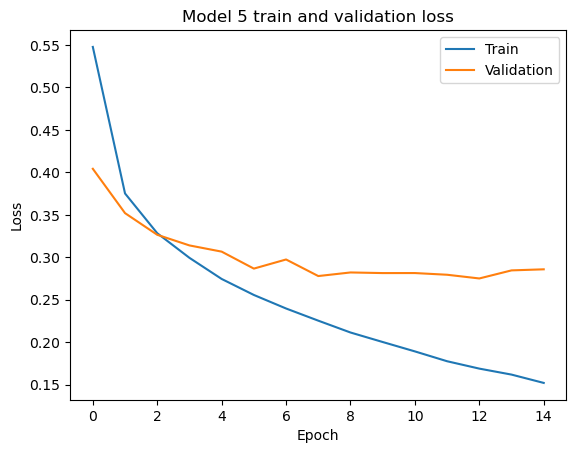

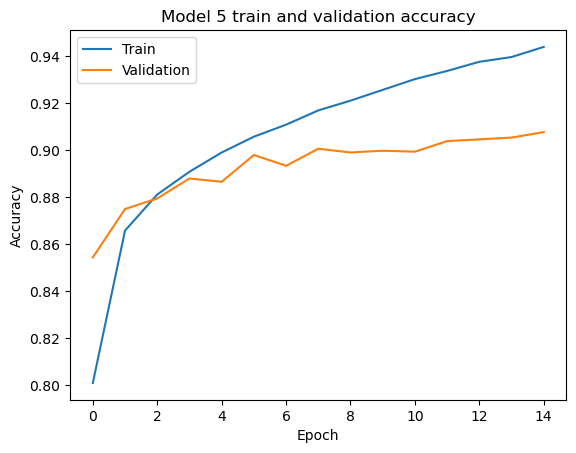

In [ ]:
plot_loss(history5, "Model 5")

# Results

In [46]:
print(f"Baseline Validation accuracy: {np.max(history.history['val_accuracy'])}")
print(f"Model 2 Validation accuracy: {np.max(history2.history['val_accuracy'])}")
print(f"Model 3 Validation accuracy: {np.max(history3.history['val_accuracy'])}")
print(f"Model 4 Validation accuracy: {np.max(history4.history['val_accuracy'])}")
print(f"Model 5 Validation accuracy: {np.max(history5.history['val_accuracy'])}")

Baseline Validation accuracy: 0.9079166650772095
Model 2 Validation accuracy: 0.9109166860580444
Model 3 Validation accuracy: 0.909500002861023
Model 4 Validation accuracy: 0.9089166522026062
Model 5 Validation accuracy: 0.9076666831970215


# Testing

Dropout model (best one)

In [40]:
print("Testing the dropout model (best model)")
_, test_acc = model2.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

# in depth evaluation
predictions = model2.predict(x_test)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_t = np.argmax(y_test, axis=1)

print("Precision: ", precision_score(y_t, predictions, average='macro'))
print("Recall: ", recall_score(y_t, predictions, average='macro'))
print(confusion_matrix(y_t, predictions))


Testing the dropout model (best model)
313/313 - 2s - loss: 0.2578 - accuracy: 0.9059 - 2s/epoch - 6ms/step

Test accuracy: 0.9059000015258789
313/313 [==============================] - 2s 5ms/step
Precision:  0.9058950548758438
Recall:  0.9058999999999999
[[863   1  31  11   3   1  81   0   8   1]
 [  4 984   0   8   1   0   1   0   2   0]
 [ 10   1 899   7  43   0  38   0   2   0]
 [ 21  11   8 877  51   0  31   0   1   0]
 [  0   2  65  15 865   0  50   0   3   0]
 [  1   0   0   0   0 981   0  11   0   7]
 [119   2  87  17  84   0 684   0   7   0]
 [  0   0   0   0   0  10   0 951   0  39]
 [  3   1   7   3   1   0   2   3 980   0]
 [  1   0   0   0   0   5   0  19   0 975]]


Baseline model (second-best one)

In [41]:
print("Testing the batch normalization model (second best model)")

_, test_acc = model4.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

predictions = model4.predict(x_test)

predictions = np.argmax(predictions, axis=1)
y_t = np.argmax(y_test, axis=1)

print("Precision: ", precision_score(y_t, predictions, average='macro'))
print("Recall: ", recall_score(y_t, predictions, average='macro'))
print(confusion_matrix(y_t, predictions))

Testing the baseline model (second best model)
313/313 - 2s - loss: 0.4457 - accuracy: 0.8933 - 2s/epoch - 6ms/step

Test accuracy: 0.8932999968528748
313/313 [==============================] - 2s 5ms/step
Precision:  0.8954488794583746
Recall:  0.8933
[[778   1  19  27   4   1 158   1  11   0]
 [  3 972   0  17   2   0   2   0   4   0]
 [ 15   0 856  18  39   0  67   1   4   0]
 [ 18   2   9 898  34   0  33   0   6   0]
 [  2   0  84  23 821   0  67   0   3   0]
 [  1   0   0   1   0 970   0   9   5  14]
 [ 69   0  63  25  65   0 764   0  14   0]
 [  0   0   0   0   0  20   0 917   7  56]
 [  1   1   4   3   2   1   6   0 981   1]
 [  0   0   1   0   0   3   0  18   2 976]]


In [47]:
# saving the model's weights
model.save_weights('./Models/model_weights.h5')
model2.save_weights('./Models/model2_weights.h5')
model3.save_weights('./Models/model3_weights.h5')
model4.save_weights('./Models/model4_weights.h5')
model5.save_weights('./Models/model5_weights.h5')


# Choice 6: Using another dataset

In [48]:
import pandas as pd
import cv2 as cv
import os

In [60]:
df = pd.read_csv('archive/styles.csv', error_bad_lines=False)

# filter out columns that are not 'id' nor 'articleType'
df = df.filter(items=['id', 'articleType'])

conversion = {
    "Tshirts": 0,
    "Tops": 0,
    "Lounge Tshirts": 0,
    "Jeans": 1,
    "Track Pants": 1,
    "Trousers": 1,
    "Lounge Pants": 1,
    "Leggings": 1,
    "Rain Trousers": 1,
    "Sweaters": 2,
    "Dresses": 3,
    "Waistcoat": 4,
    "Rain Jacket": 4,
    "Jackets": 4,
    "Nehru Jackets": 4,
    "Sandals": 5,
    "Sports Sandals": 5,
    "Shirts": 6,
    "Sweatshirts": 6,
    "Casual Shoes": 7,
    "Sports Shoes": 7,
    "Handbags": 8,
    "Duffel Bag": 8,
    "Booties": 9
}

C:\Users\bais_\AppData\Local\Temp\ipykernel_4844\1653407975.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('archive/styles.csv', error_bad_lines=False)
Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping line 33

In [55]:
def preprocess_image(image_path):
    # Load the image
    image = cv.imread(image_path)
    height, width = image.shape[:2]
    aspect_ratio = float(width) / float(height)

    # background removal
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    ret, mask = cv.threshold(gray, 240, 255, cv.THRESH_BINARY)
    mask = cv.bitwise_not(mask)
    result = cv.bitwise_and(gray, gray, mask=mask)
    # Replace the background with black
    result[mask == 0] = 0

    # calculating the new dimensions for 28x28 while maintaining the aspect ratio
    if aspect_ratio > 1:
        new_width = 28
        new_height = int(round(new_width / aspect_ratio))
    else:
        new_height = 28
        new_width = int(round(new_height * aspect_ratio))

    # resizing the image using the calculated dimensions
    resized_img = cv.resize(result, (new_width, new_height), interpolation=cv.INTER_AREA)

    # adding padding to make the image 28x28
    padding_x1 = (28 - new_width) // 2
    padding_y1 = (28 - new_height) // 2
    padding_x2 = 28 - new_width - padding_x1
    padding_y2 = 28 - new_height - padding_y1

    resized_img = cv.copyMakeBorder(resized_img, padding_y1, padding_y2, padding_x1, padding_x2, cv.BORDER_CONSTANT)

    # normalization
    normalized_image = resized_img / 255.0

    return normalized_image

In [61]:
x_other = []
y_other = []
for i in range(len(df)):
    id_item = df.iloc[i, 0]
    articleType = df.iloc[i, 1]
    img_path = f'archive/images/{id_item}.jpg'
    exists = os.path.isfile(img_path)
    if articleType in conversion and exists:
        x_other.append(preprocess_image(f'archive/images/{id_item}.jpg'))
        y_other.append(conversion[articleType])

x_other = np.array(x_other)
y_other = to_categorical(np.array(y_other))

## Testing on the other dataset

In [ ]:
test_loss, test_acc = model2.evaluate(x_other, y_other, verbose=2)

print('\nTest accuracy:', test_acc)

# in depth evaluation
predictions = model2.predict(x_other)

# going back to labels
predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_other, axis=1)



print("Precision: ", precision_score(y_test, predictions, average='macro'))
print("Recall: ", recall_score(y_test, predictions, average='macro'))

print(confusion_matrix(y_test, predictions))

In [ ]:
occurrences = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i, p in enumerate(predictions):
    if p != y_test[i]:
        occurrences[y_test[i]] += 1

percentages = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(10):
    percentages[i] = occurrences[i] / np.sum(y_test == i)
print(percentages)